In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import numpy as np
from scipy.stats import gmean


In [12]:
def get_plot_for_column(column_num):
    files = [
            # "dense_model",
            # "SRSTE_NM_2_4",
            # "SRSTE_NM_1_4",
            # "SRSTE_NM_1_64",
            "SRSTE_NM_1_128",
            # "STRUCT_NM_2_4",
            # "STRUCT_NM_1_4",
            # "STRUCT_NM_1_64",
            # "STRUCT_NM_1_128",
            # "STRUCT_EXP_NM_2_4",
            # "STRUCT_EXP_NM_1_4",
            # "STRUCT_EXP_NM_1_64",
            "STRUCT_EXP_NM_1_128",
            #  "STRUCT_LINEAR_NM_2_4"
            # "STRUCT_LINEAR_NM_1_4",
            # "STRUCT_LINEAR_NM_1_64",
            "STRUCT_LINEAR_NM_1_128",
            # "20230510-171035-vit_ultra_tiny_patch16_224-224"
             ]

    data = []
    # print(files)
    for file in files:
        df = pd.read_csv("vit_model_full_1105/"+file+"/model_stats.csv")

        # Group the columns into groups of 4, compute the geometric mean of each group, and create a new DataFrame
        # df_geomean = pd.DataFrame({'Mean weights': gmean(abs(df.iloc[:, 1:36:6]), axis=1),
        #                            'Std weights': gmean(abs(df.iloc[:, 2:36:6]), axis=1),
        #                            'L2 norm_weight_diff': gmean(abs(df.iloc[:, 3:36:6]), axis=1),
        #                            'Linf norm_weight_diff': gmean(abs(df.iloc[:, 4:36:6]), axis=1),
        #                            'SAD_L1': gmean(abs(df.iloc[:, 5:36:6]), axis=1),
        #                            'SAD L2': gmean(abs(df.iloc[:, 6:36:6]), axis=1),
        #                            'grad_mean': gmean(abs(df.iloc[:, 37::3]), axis=1),
        #                            'grad_L2': gmean(abs(df.iloc[:, 38::3]), axis=1),
        #                            'grad_Linf': gmean(abs(df.iloc[:, 39::3]), axis=1),})

        # df['diff'] = df[].diff()

        # df_geomean['diff'] = df_geomean[df_geomean.columns[column_num]] - df_geomean[df_geomean.columns[column_num]].shift(1)

        
        # data.append(df_geomean.iloc[:, -1])
        data.append(df.iloc[:, column_num])
        # data.append(df_geomean.iloc[:, column_num]) 

    plt.figure(figsize=(10, 5))
    for i, d in zip(files,data):
        # Compute the moving average of the data with a window size of 10
        window_size = 40
        moving_avg = np.convolve(d[:], np.ones(window_size)/window_size, mode='valid')

        plt.plot(moving_avg, label=f'{i}')

    # plt.plot(np.zeros(moving_avg.shape), c='grey)
    plt.xlabel('Steps')
    plt.ylabel('Magnitude')
    # plt.ylim(bottom=-0.5e-6)
    # plt.xlim(left=250)
    # plt.title(f'Line graph of {df_geomean.columns[column_num]} files')
    plt.title(f'Line graph of {df.columns[column_num]} files')
    plt.legend()
    plt.show()
    return plt


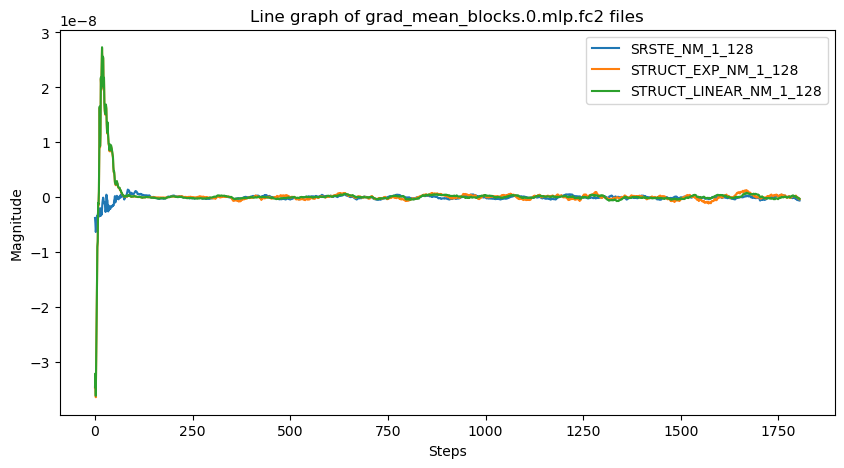

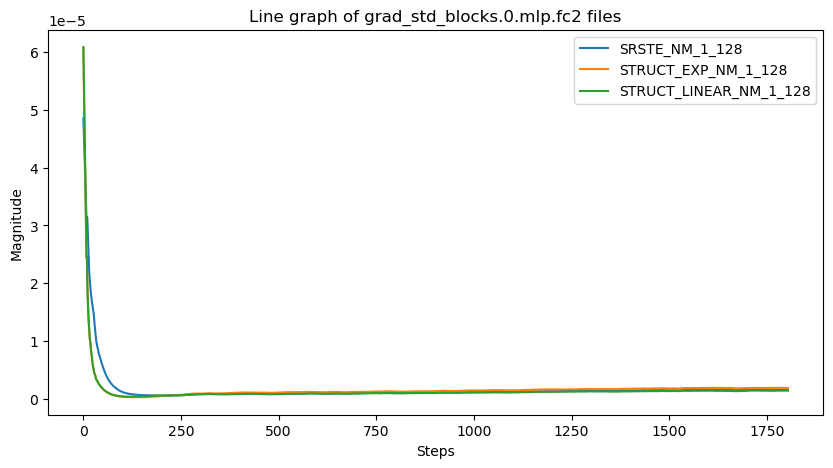

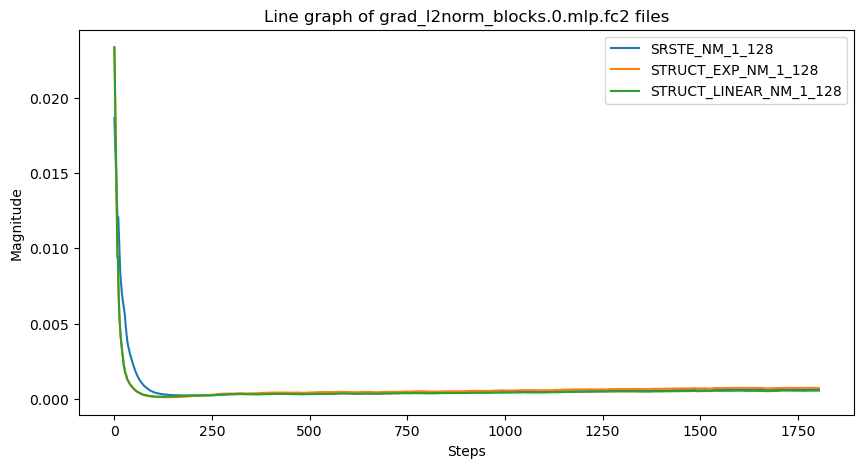

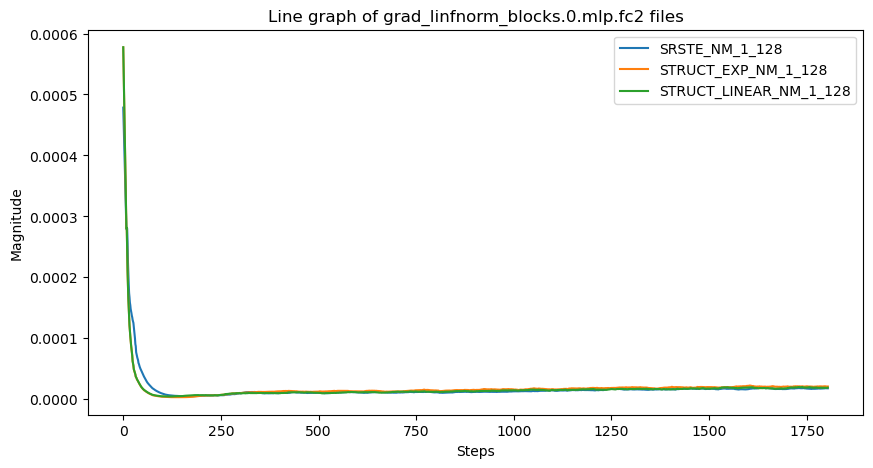

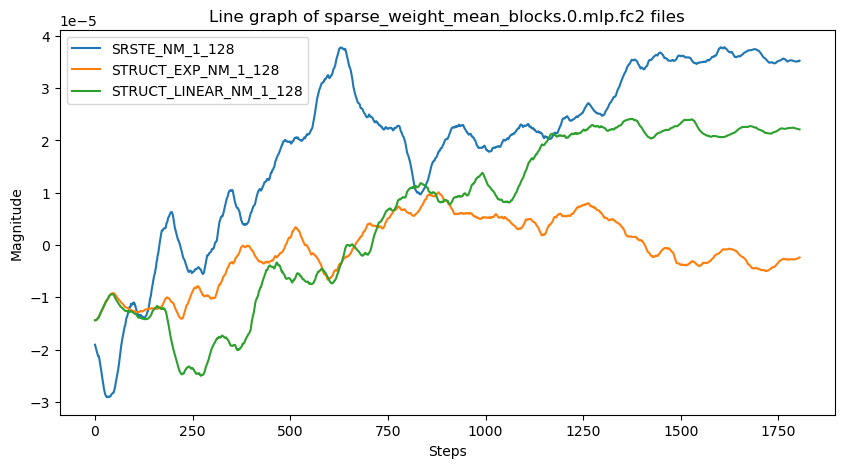

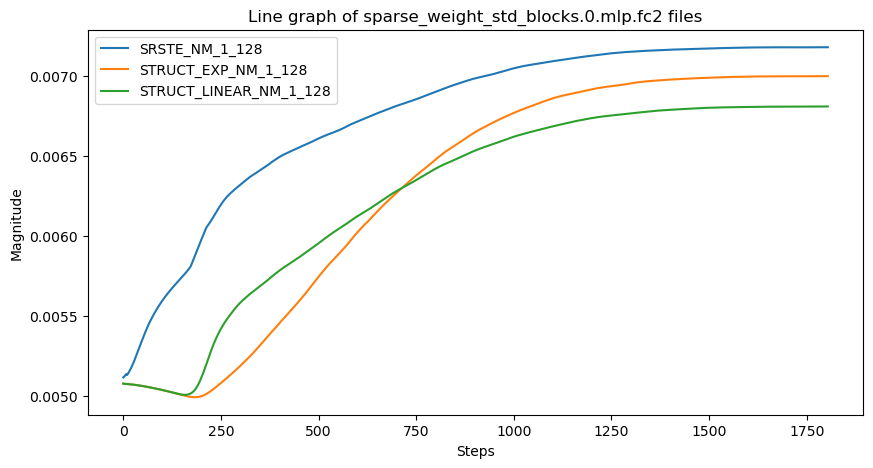

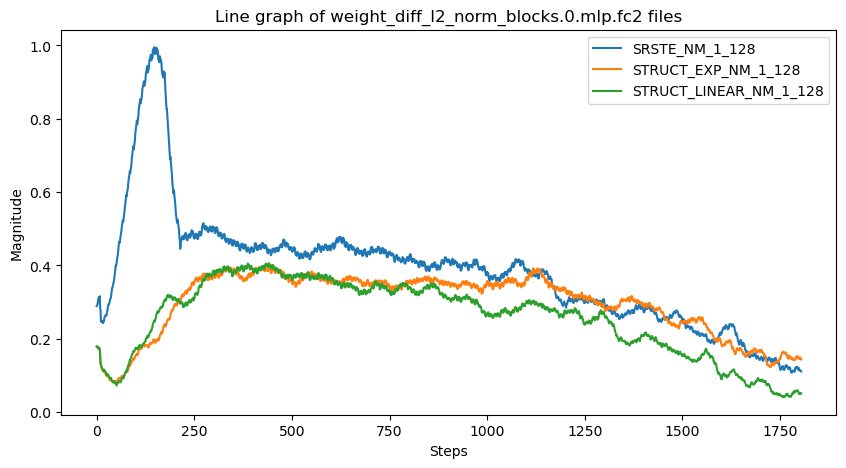

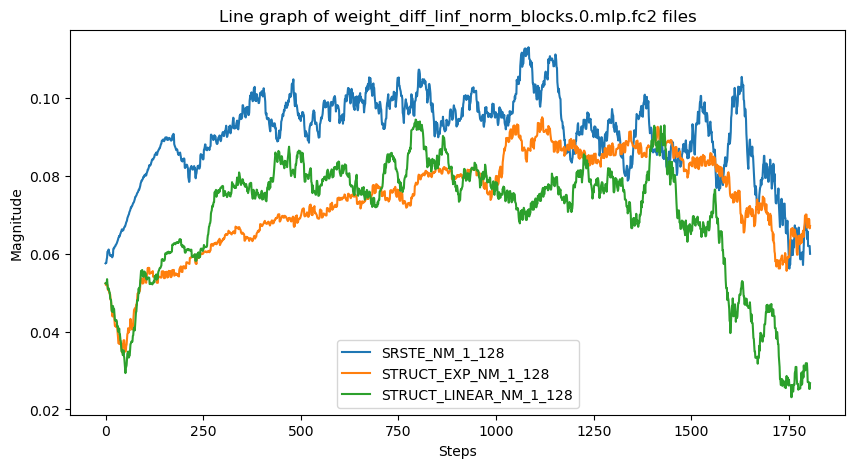

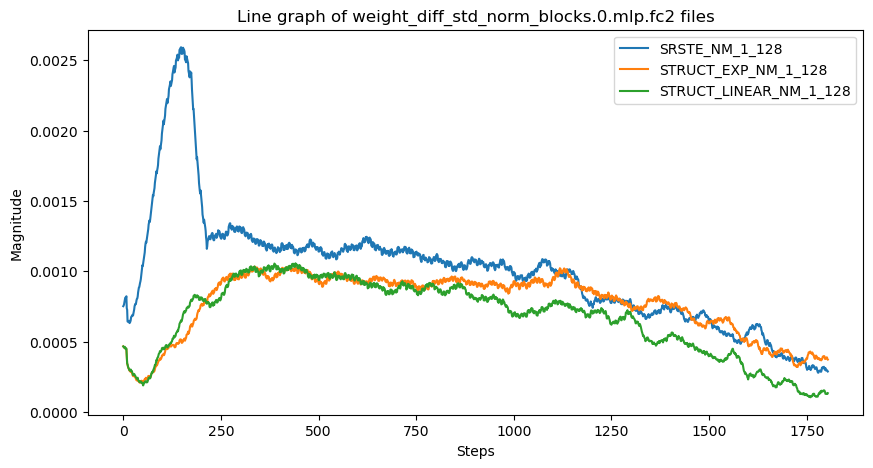

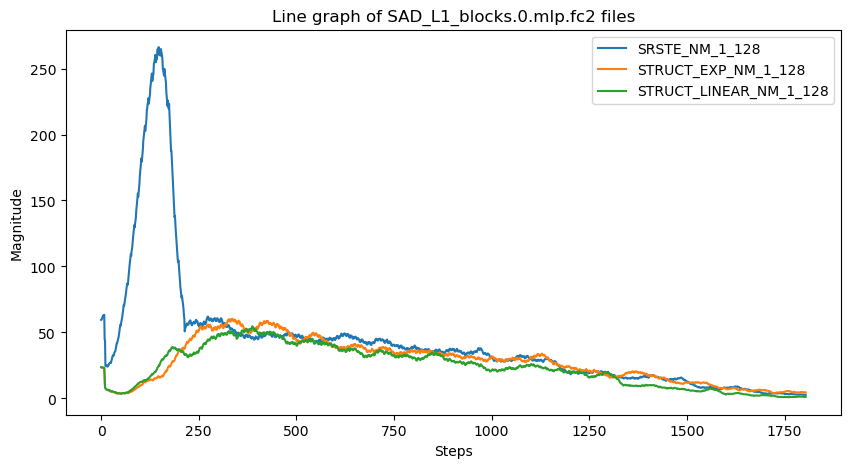

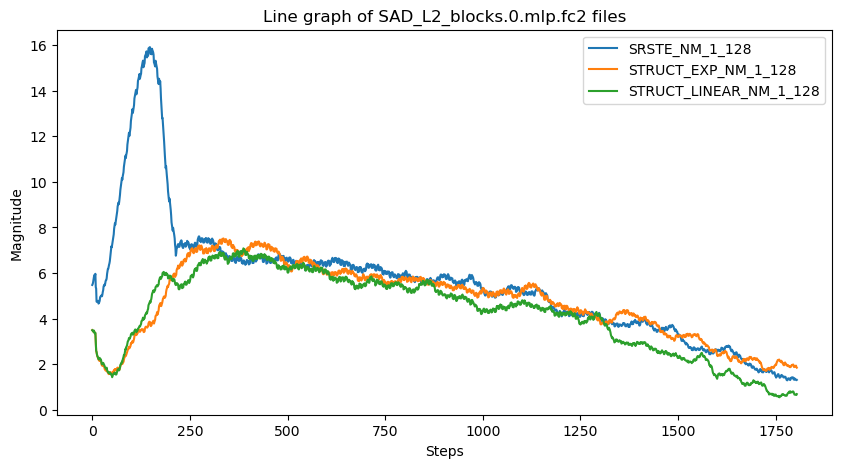

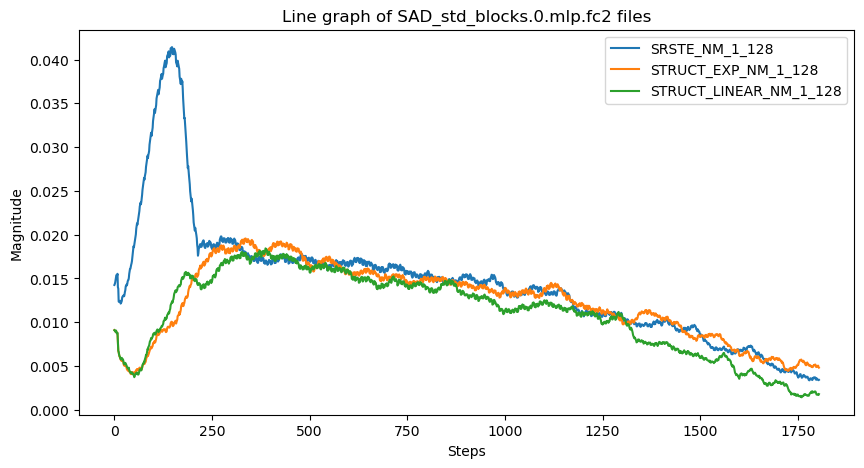

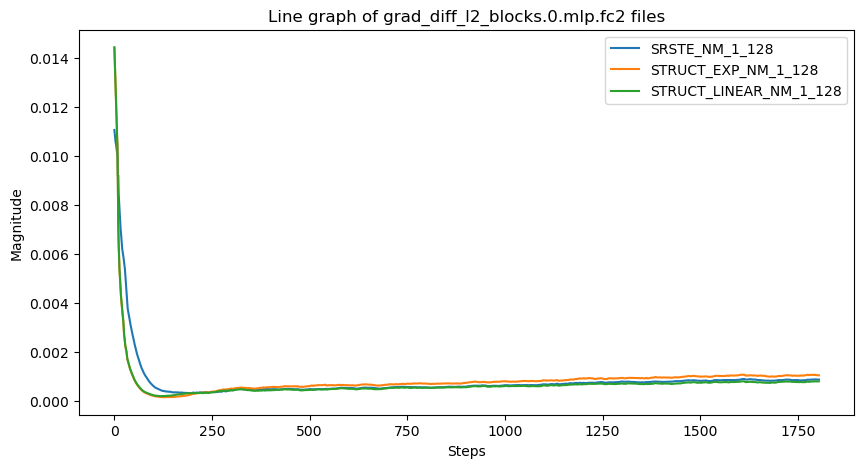

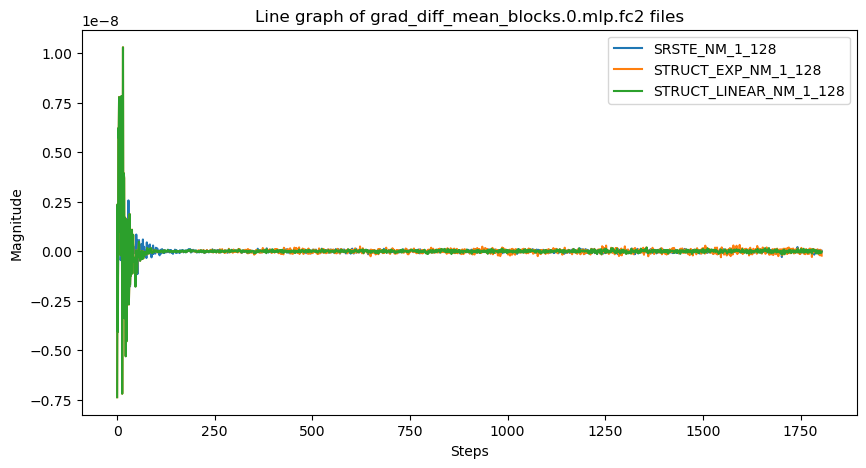

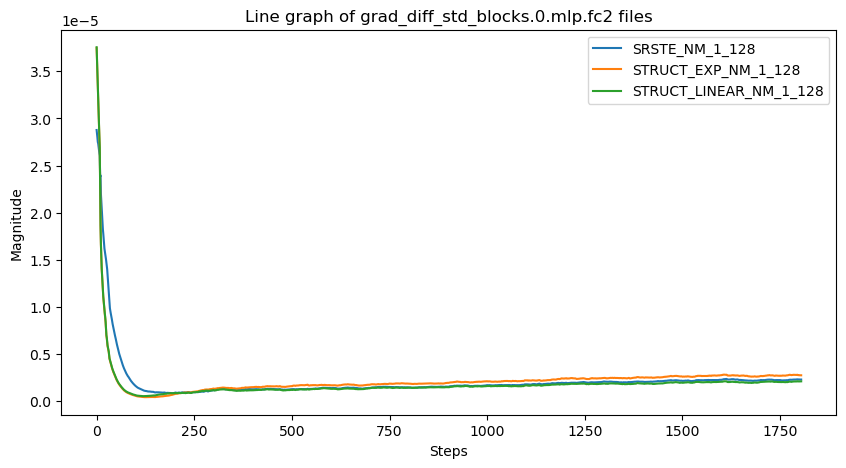

In [13]:
block_num = 1
for i in range(block_num*15+1,(block_num+1)*15+1):
    get_plot_for_column(i)
# for i in range(36,39):
#     get_plot_for_column(i)  

In [5]:
df = pd.read_csv("/usr/scratch/abhimanyu/work/google_nm_sparse_training/pytorch-image-models-sparsity/vit_model_full_1105/SRSTE_NM_1_128/model_stats.csv")

In [6]:
df.columns

Index(['loss', 'grad_mean_blocks.0.mlp.fc1', 'grad_std_blocks.0.mlp.fc1',
       'grad_l2norm_blocks.0.mlp.fc1', 'grad_linfnorm_blocks.0.mlp.fc1',
       'sparse_weight_mean_blocks.0.mlp.fc1',
       'sparse_weight_std_blocks.0.mlp.fc1',
       'weight_diff_l2_norm_blocks.0.mlp.fc1',
       'weight_diff_linf_norm_blocks.0.mlp.fc1',
       'weight_diff_std_norm_blocks.0.mlp.fc1', 'SAD_L1_blocks.0.mlp.fc1',
       'SAD_L2_blocks.0.mlp.fc1', 'SAD_std_blocks.0.mlp.fc1',
       'grad_diff_l2_blocks.0.mlp.fc1', 'grad_diff_mean_blocks.0.mlp.fc1',
       'grad_diff_std_blocks.0.mlp.fc1', 'grad_mean_blocks.0.mlp.fc2',
       'grad_std_blocks.0.mlp.fc2', 'grad_l2norm_blocks.0.mlp.fc2',
       'grad_linfnorm_blocks.0.mlp.fc2', 'sparse_weight_mean_blocks.0.mlp.fc2',
       'sparse_weight_std_blocks.0.mlp.fc2',
       'weight_diff_l2_norm_blocks.0.mlp.fc2',
       'weight_diff_linf_norm_blocks.0.mlp.fc2',
       'weight_diff_std_norm_blocks.0.mlp.fc2', 'SAD_L1_blocks.0.mlp.fc2',
       'SAD_L2_bloc